# **Model Building (RandomForestRegressor)**

In [19]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 85.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [21]:
model = RandomForestRegressor().fit(xtrain,ytrain)

model

RandomForestRegressor()

**Accuracy Check**

In [22]:
y_test_pred  = model.predict(xtest)

r2_testing = r2_score(ytest,y_test_pred)

r2_testing*100

97.92782810644736

### **Prediction**

In [23]:
data = x.loc[[10000,8000,55000]]
data

,Store,Dept,IsHoliday,Temperature,Fuel_Price,Day,Month,Year,Type,Size,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
10000,16,90,0,18.12,2.586,26,2,2010,2,57197,5480.7127,1822.1091,78.6696,1486.1364,2779.0627,189.601802,7.039
8000,30,97,0,39.75,2.514,19,2,2010,3,42988,560.1677,888.5600,41.9200,141.3344,2805.0176,210.945160,8.324
55000,32,2,0,70.86,2.684,11,6,2010,1,203007,14109.1464,221.9419,43.7785,3545.2663,5765.7583,189.400073,8.963


In [24]:
actual = [y.loc[10000],y.loc[8000],y.loc[55000]]
actual

[5302.95, 13058.64, 50918.38]

In [25]:
predicted = model.predict(data)

predicted

array([ 5274.595504, 13835.5934  , 50488.5804  ])

**`Plot`**

Difference : [28.354495999997198, -776.9534000000131, 429.7996000000494]



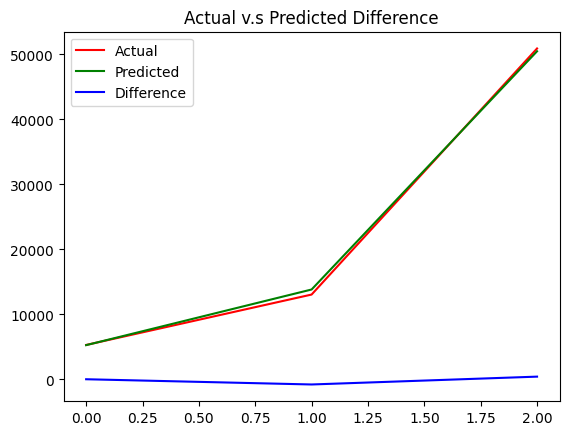

In [26]:
difference = [actual[i]-predicted[i] for i in range(len(actual))]

print(f'Difference : {difference}')

print()

plt.plot(actual,label='Actual',color='r')
plt.plot(predicted,label='Predicted',color='g')
plt.plot(difference,label='Difference',color='b')
plt.legend()

plt.title('Actual v.s Predicted Difference')
plt.show()

### **Feature Importance**

In [34]:
importance = model.feature_importances_
importance

array([5.40067764e-02, 6.38200949e-01, 3.36196854e-04, 6.97841871e-03,
       2.91053604e-03, 4.86621714e-03, 1.26224685e-02, 6.82662971e-04,
       1.45843935e-02, 1.80837537e-01, 3.14579607e-03, 3.21313323e-03,
       3.68774056e-02, 7.59643124e-03, 2.54912305e-03, 2.18436060e-02,
       8.74834912e-03])

In [28]:
feature = [i for i in x.columns]
feature

['Store',
 'Dept',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'Day',
 'Month',
 'Year',
 'Type',
 'Size',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [29]:
feature_importance = {}

for i in range(len(feature)):
     feature_importance.update({feature[i]:importance[i]*100})


feature_importance

{'Store': 5.400677640631692,
 'Dept': 63.820094856860706,
 'IsHoliday': 0.03361968537668894,
 'Temperature': 0.697841870778426,
 'Fuel_Price': 0.2910536037688869,
 'Day': 0.4866217142770564,
 'Month': 1.2622468549363708,
 'Year': 0.06826629710926692,
 'Type': 1.4584393492628722,
 'Size': 18.083753692984878,
 'MarkDown1': 0.31457960720282324,
 'MarkDown2': 0.3213133225906665,
 'MarkDown3': 3.6877405632638673,
 'MarkDown4': 0.7596431239944353,
 'MarkDown5': 0.25491230537256937,
 'CPI': 2.184360599127873,
 'Unemployment': 0.874834912460924}

In [30]:
sorted_feature_importance  = dict(sorted(feature_importance.items(),key=lambda item : item[1],reverse=True))
sorted_feature_importance

{'Dept': 63.820094856860706,
 'Size': 18.083753692984878,
 'Store': 5.400677640631692,
 'MarkDown3': 3.6877405632638673,
 'CPI': 2.184360599127873,
 'Type': 1.4584393492628722,
 'Month': 1.2622468549363708,
 'Unemployment': 0.874834912460924,
 'MarkDown4': 0.7596431239944353,
 'Temperature': 0.697841870778426,
 'Day': 0.4866217142770564,
 'MarkDown2': 0.3213133225906665,
 'MarkDown1': 0.31457960720282324,
 'Fuel_Price': 0.2910536037688869,
 'MarkDown5': 0.25491230537256937,
 'Year': 0.06826629710926692,
 'IsHoliday': 0.03361968537668894}

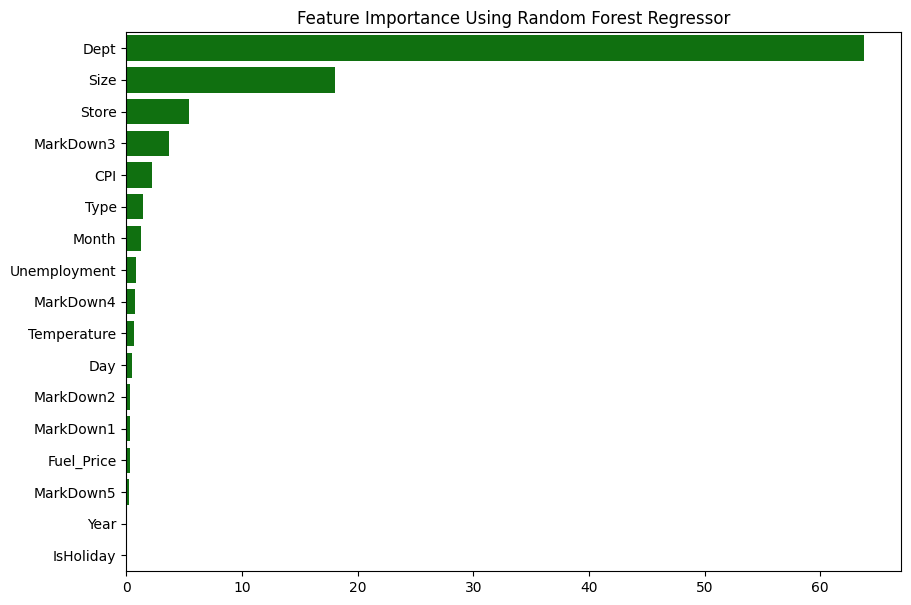

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x=[i for i in sorted_feature_importance.values()],y=[i for i in sorted_feature_importance.keys()],color='g').set(title='Feature Importance Using Random Forest Regressor')
plt.show()

### **Pickle File**

**Download The Model**

In [33]:
with open('regressor_model.pkl','wb') as f:
  pickle.dump(model,f)



```                                                               
                                                     Finished
```

